# Unit 7 - Distinguishing Sentiments
The first plot will be and/or feature the following:

* Be a scatter plot of sentiments of the last 100 tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
* Each plot point will reflect the compound sentiment of a tweet.
* Sort each plot point by its relative timestamp.
* The second plot will be a bar plot visualizing the overall sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, and VADER.
Your final Jupyter notebook must:

* Pull last 100 tweets from each outlet.
* Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet. 
* Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
* Export the data in the DataFrame into a CSV file.
* Save PNG images for each plot.

As final considerations:

* Use the Matplotlib libraries.
* Include a written description of three observable trends based on the data. 
* Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.
* Include an exported markdown version of your Notebook called README.md in your GitHub repository.

## 3 Overall Observations
* The sentiment analysis for each media outlet fluctuates frequently making it difficult to truly understand the overall sentiment. 
* Generally speaking, most outlets are biased in what is tweeted out. For example, the positive tweets from FOX News are very right leaning whereas the tweets with a negative sentiment are focused on left leaning politics.
* Additionally, FOX News tends to tweet out more negatively focused messaging.

In [1]:
# Import dependencies
import tweepy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from datetime import datetime

from config import (consumer_key, consumer_secret, access_token, access_token_secret)

In [2]:
# Setup Tweepy API authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Target Twitter Accounts
target_terms = ("@BBC", "@CBS", "@CNN", "@FOXNEWS", "@NYTIMES")

In [4]:
# Filter out non-human activity
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

In [5]:
# Create array to hold sentiment
sentiments = []

counter = 1

# Loop through target accounts
for target in target_terms:
    oldest_tweet = None
    compound_list = []
    positive_list = []
    neutral_list = []
    negative_list = []
    
    # Loop through range to obtain the last 100 tweets by each account
    for loop in range(4):
        public_tweets = api.search(target, count=100, result_type="recent", max_id=oldest_tweet)
        for tweet in public_tweets["statuses"]:
            # Utilize the non-human filters
            if (tweet["user"]["followers_count"] < max_followers and
                tweet["user"]["statuses_count"] > min_tweets and
                tweet["user"]["statuses_count"] < max_tweets and
                tweet["user"]["friends_count"] < max_following and
                tweet["user"]["lang"] == lang):
                
                #Run VADER Analysis on each tweet
                results = analyzer.polarity_scores(tweet["text"])
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]
                tweets_ago = counter
                
                # Push to each array
                compound_list.append(compound)
                positive_list.append(pos)
                neutral_list.append(neu)
                negative_list.append(neg)
                
                # Set oldest tweet value
                oldest_tweet = int(tweet["id_str"]) - 1
                
                # Create a sentiments dictionary
                sentiments.append({"User": target,
                                   "Tweet": tweet["text"],
                                   "Date": tweet["created_at"],
                                   "Compound": compound,
                                   "Positive": pos,
                                   "Neutral": neu,
                                   "Negative": neg,
                                   "Tweets Ago": counter})
                # Add to counter
                counter = counter+1


In [6]:
# Convert sentiments to dataframe
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweet,Tweets Ago,User
0,0.2500,Sat Mar 17 00:12:34 +0000 2018,0.060,0.833,0.106,RT @Trickyjabs: So @BBCNewsnight has now cast ...,1,@BBC
1,0.0000,Sat Mar 17 00:12:08 +0000 2018,0.000,1.000,0.000,@bbc editorial controls need investigation htt...,2,@BBC
2,-0.2500,Sat Mar 17 00:11:58 +0000 2018,0.229,0.659,0.112,@Trickyjabs @mac123_m @BBCNewsnight @BBC Surel...,3,@BBC
3,-0.4572,Sat Mar 17 00:11:23 +0000 2018,0.120,0.880,0.000,The @BBC are so desperate to hang onto the lic...,4,@BBC
4,0.2500,Sat Mar 17 00:10:34 +0000 2018,0.060,0.833,0.106,RT @Trickyjabs: So @BBCNewsnight has now cast ...,5,@BBC


In [7]:
# Split the sentiments_pd dataframe into smaller dataframes for each news outlet
bbc_df = sentiments_pd.loc[sentiments_pd['User']=='@BBC', :].reset_index(drop=True).head(100)
cbs_df = sentiments_pd.loc[sentiments_pd['User']=='@CBS', :].reset_index(drop=True).head(100) 
cnn_df = sentiments_pd.loc[sentiments_pd['User']=='@CNN', :].reset_index(drop=True) .head(100)
fox_df = sentiments_pd.loc[sentiments_pd['User']=='@FOXNEWS', :].reset_index(drop=True).head(100) 
nyt_df = sentiments_pd.loc[sentiments_pd['User']=='@NYTIMES', :].reset_index(drop=True).head(100)

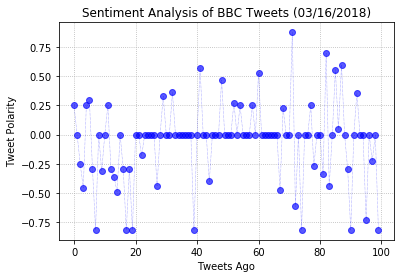

In [8]:
# Create scatter plot for BBC sentiment analysis
plt.plot(np.arange(len(bbc_df["Compound"])),
         bbc_df["Compound"], marker="o", linewidth=0.5,
         alpha=0.65, color='b', linestyle=':')
plt.title("Sentiment Analysis of BBC Tweets (03/16/2018)")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid(linestyle='dotted')

plt.savefig("BBC_Sentiment.png")
plt.show()

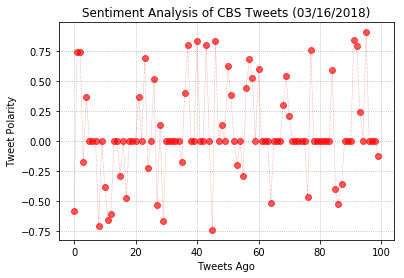

In [9]:
# Create scatter plot for CBS sentiment analysis
plt.plot(np.arange(len(cbs_df["Compound"])),
         cbs_df["Compound"], marker="o", linewidth=0.5,
         alpha=0.65, color='r', linestyle=':')
plt.title("Sentiment Analysis of CBS Tweets (03/16/2018)")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid(linestyle='dotted')

plt.savefig("CBS_Sentiment.png")
plt.show()

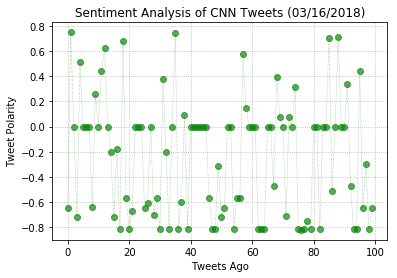

In [16]:
# Create scatter plot for CNN sentiment analysis
plt.plot(np.arange(len(cnn_df["Compound"])),
         cnn_df["Compound"], marker="o", linewidth=0.5,
         alpha=0.65, color='g', linestyle=':')
plt.title("Sentiment Analysis of CNN Tweets (03/16/2018)")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid(linestyle='dotted')

plt.savefig("CNN_Sentiment.png")
plt.show()

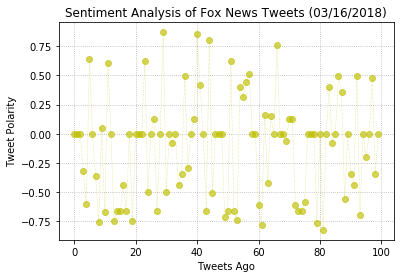

In [11]:
# Create scatter plot for Fox sentiment analysis
plt.plot(np.arange(len(fox_df["Compound"])),
         fox_df["Compound"], marker="o", linewidth=0.5,
         alpha=0.65, color='y', linestyle=':')
plt.title("Sentiment Analysis of Fox News Tweets (03/16/2018)")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid(linestyle='dotted')

plt.savefig("FOX_Sentiment.png")
plt.show()

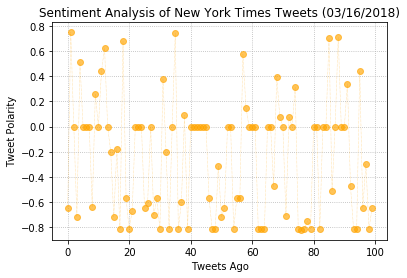

In [12]:
# Create scatter plot for NYT sentiment analysis
plt.plot(np.arange(len(nyt_df["Compound"])),
         cnn_df["Compound"], marker="o", linewidth=0.5,
         alpha=0.65, color='orange', linestyle=':')
plt.title("Sentiment Analysis of New York Times Tweets (03/16/2018)")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid(linestyle='dotted')

plt.savefig("NYT_Sentiment.png")
plt.show()

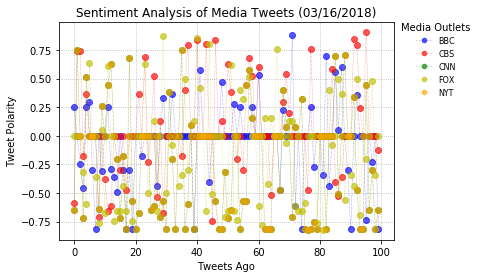

In [13]:
# Combo scatter plot
bbc_plt = plt.plot(np.arange(len(bbc_df["Compound"])),bbc_df["Compound"], marker="o", linewidth=0.5,alpha=0.65, color='b', linestyle=':')
cbs_plt = plt.plot(np.arange(len(cbs_df["Compound"])),cbs_df["Compound"], marker="o", linewidth=0.5,alpha=0.65, color='r', linestyle=':')
cnn_plt = plt.plot(np.arange(len(cnn_df["Compound"])),cnn_df["Compound"], marker="o", linewidth=0.5,alpha=0.65, color='g', linestyle=':')
fox_plt = plt.plot(np.arange(len(fox_df["Compound"])),fox_df["Compound"], marker="o", linewidth=0.5,alpha=0.65, color='y', linestyle=':')
nyt_plt = plt.plot(np.arange(len(nyt_df["Compound"])),cnn_df["Compound"], marker="o", linewidth=0.5,alpha=0.65, color='orange', linestyle=':')


plt.grid(linestyle='dotted')
plt.title("Sentiment Analysis of Media Tweets (03/16/2018)")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.legend(('BBC', 'CBS', 'CNN', 'FOX', 'NYT'),scatterpoints=1,loc='upper left',bbox_to_anchor=(1.0, 1.035),ncol=1,\
           fontsize=8, markerscale=0.75,title='Media Outlets',edgecolor='none',framealpha=1.00)

plt.savefig("Media_Aggregate_Analysis.png")
plt.show()

In [14]:
# aggregate overall media sentiment for each news outlet
bbc_agg = bbc_df['Compound'].mean()
cbs_agg = cbs_df['Compound'].mean()
cnn_agg = cnn_df['Compound'].mean()
fox_agg = fox_df['Compound'].mean()
nyt_agg = nyt_df['Compound'].mean()

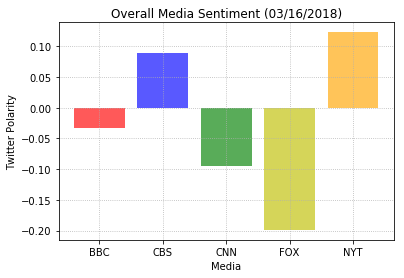

In [15]:
# Combo bar plot
media_agg = ['BBC', 'CBS', 'CNN', 'FOX', 'NYT']
sentiment = [-0.033, 0.090, -0.095, -0.199, 0.123]
x_axis = np.arange(len(sentiment))

colors = ['r', 'b', 'g', 'y', 'orange']

plt.bar(x_axis, sentiment, color=colors, alpha=0.65, align='edge')

tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "FOX", "NYT"])

plt.grid(linestyle='dotted')
plt.title("Overall Media Sentiment (03/16/2018)")
plt.xlabel("Media")
plt.ylabel("Twitter Polarity")

plt.savefig("Media_Mean_Sentiment.png")
plt.show()